In [15]:
# Loading Dependencies
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import os
data_directory = "../data/raw/"

In [16]:
# Loading data
images = []
images_files = [i for i in os.listdir(data_directory)]
print(images_files[0:5])
print(len(images_files))

['32Q4.png', '97SX.png', '9K8W.png', 'WV2B.png', '5M8F.png']
9955


../data/raw/32Q4.png
3
2
Q
4


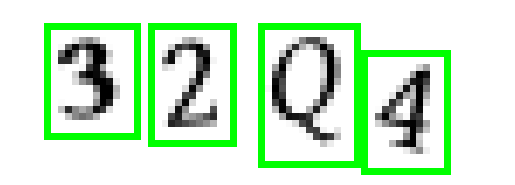

In [ ]:
# Processign one image
processed_folder = "../data/processed/"
img_directory = data_directory + images_files[0]
print(img_directory)
img = cv.imread(img_directory, cv.IMREAD_GRAYSCALE)
cv.imshow("Image", img)
cv.destroyAllWindows()
inverted = cv.bitwise_not(img)
_, threshold_image = cv.threshold(inverted, 10, 255, cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(threshold_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

img_coloured = cv.cvtColor(img, cv.COLOR_GRAY2RGB)

letters_count = 0

bounding_boxes = [cv.boundingRect(i) for i in contours]
print(bounding_boxes)

for i in range(len(contours)):
    if letters_count < i:
        continue
    cnt = contours[i]
    x, y, w, h = cv.boundingRect(cnt)
    cv.rectangle(img_coloured, (x-2,y-2), (x+w+2, y+h+2), (0, 255, 0), 1)
    # if (w) > (h*5/6):
    #     roi1 = img[(y-2):(y+h+2), (x-2):int(x+1+w/2)]
    #     roi2 = img[y-2:y+h+2, int(x+1+w/2):(x+w+2)]
    #     label1 = images_files[0][i]
    #     label2 = images_files[0][i+1]
    #     letters_count += 2
    #     try:
    #         os.makedirs(processed_folder + label1, exist_ok = False)
    #         os.makedirs(processed_folder + label2, exist_ok = False)
    #     except:
    #         print("A folder has existed with these names")
    #     output_path = os.path.join(processed_folder + label1, f'{len(os.listdir(processed_folder + label1))}.png')
    #     cv.imwrite(output_path, roi1)
    #     output_path = os.path.join(processed_folder + label2, f'{len(os.listdir(processed_folder + label2))}.png')
    #     cv.imwrite(output_path, roi2)

    # else:
    roi = img[y-2:y+h+2, x-2:x+w+2]
    
    label = images_files[0][i]
    print(label)
    letters_count += 1
    try:
        os.makedirs(processed_folder + label, exist_ok = False)
    except:
        print("A folder has existed with this name")
    output_path = os.path.join(processed_folder + label, f'{len(os.listdir(processed_folder + label))}.png')
    cv.imwrite(output_path, roi)

plt.imshow(img_coloured)
plt.axis("off")
plt.show()
